In [8]:
import numpy as np
import scipy.stats
import scipy.signal

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
rv = scipy.stats.uniform()

# Лабораторна робота №5

In [10]:
ng = 51
n = int(ng / 4)

N = 2 ** n
M = 20

In [11]:
i = np.arange(N)

s2 = 2 * rv.rvs(N) \
     + ng * np.cos(2 * M * np.pi * i / N) * (1 + 0.1 * rv.rvs(N)) \
     + 17 * np.cos(4 * M * np.pi * i / N + rv.rvs(N)) \
        + 3 * np.cos(5 * M * np.pi * i / N) * rv.rvs(N) * (rv.rvs(N) + ng)

In [46]:
def transformation(s1):
    i = np.arange(N)
    
    a = np.array([(2 / N) * np.sum(s1 * np.cos(2 * np.pi * i * l / N)) 
                  for l in range(1, int(N/2 - 1))])
    a0 = np.array([(1 / N) * np.sum(s1 * np.cos(0))])
    an = np.array([(1 / N) * np.sum(s1 * np.cos(np.pi * i))])
    
    a = np.insert(a, 0, a0)
    a = np.append(a, an)
    
    b = np.array([(2 / N) * np.sum(s1 * np.sin(2 * np.pi * i * j / N)) 
                  for j in range(int(N/2))])
    
    c = np.sqrt(a ** 2 + a ** 2)

    return a, b, c

In [47]:
def reverse_transformation(a, b):
    j = np.arange(int(N / 2))
    
    return np.array([np.sum(a * np.cos(2 * np.pi * j * i / N)) 
                     + np.sum(b * np.sin(2 * np.pi * j * i / N)) 
                     for i in range(N)])

In [48]:
def plot(s1, a, b, r1):
    fig, ax = plt.subplots(5, 1, figsize=(20, 20))
    
    ax[0].set_title("Actual")
    ax[0].plot(s1)
    
    ax[1].set_title("A")
    ax[1].plot(a)
    
    ax[2].set_title("B")
    ax[2].plot(b)
    
    ax[3].set_title("Reverse transformation")
    ax[3].plot(r1)
    
    ax[4].set_title("Difference")
    ax[4].plot(s1 - r1)
    
    plt.show()

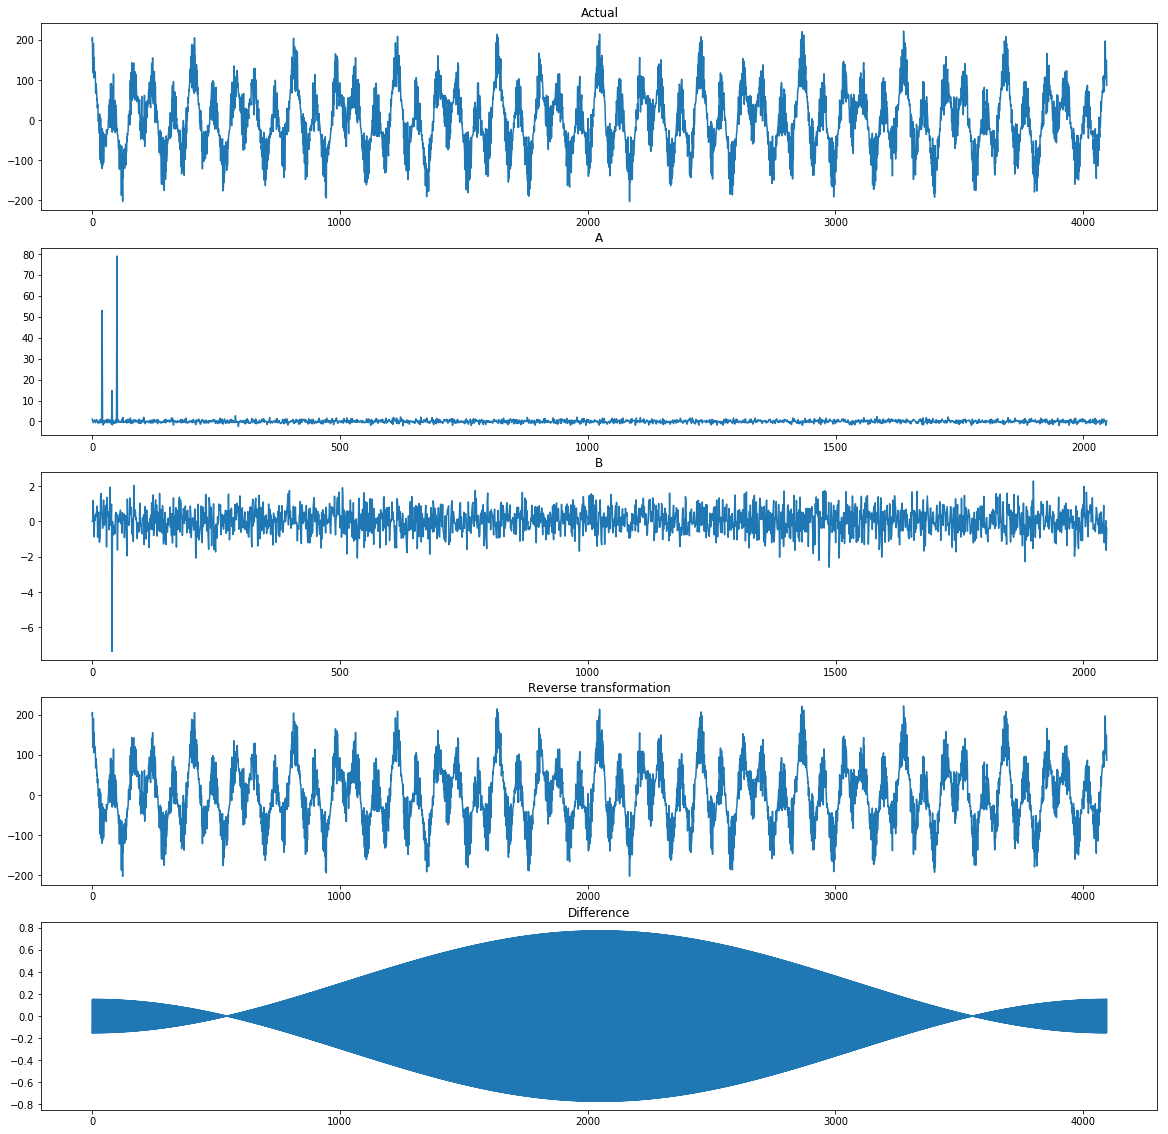

In [50]:
s1 = s2

a, b, c = transformation(s1=s1)
r1 = reverse_transformation(a, b)
plot(s1=s1, a=a, b=b, r1=r1)

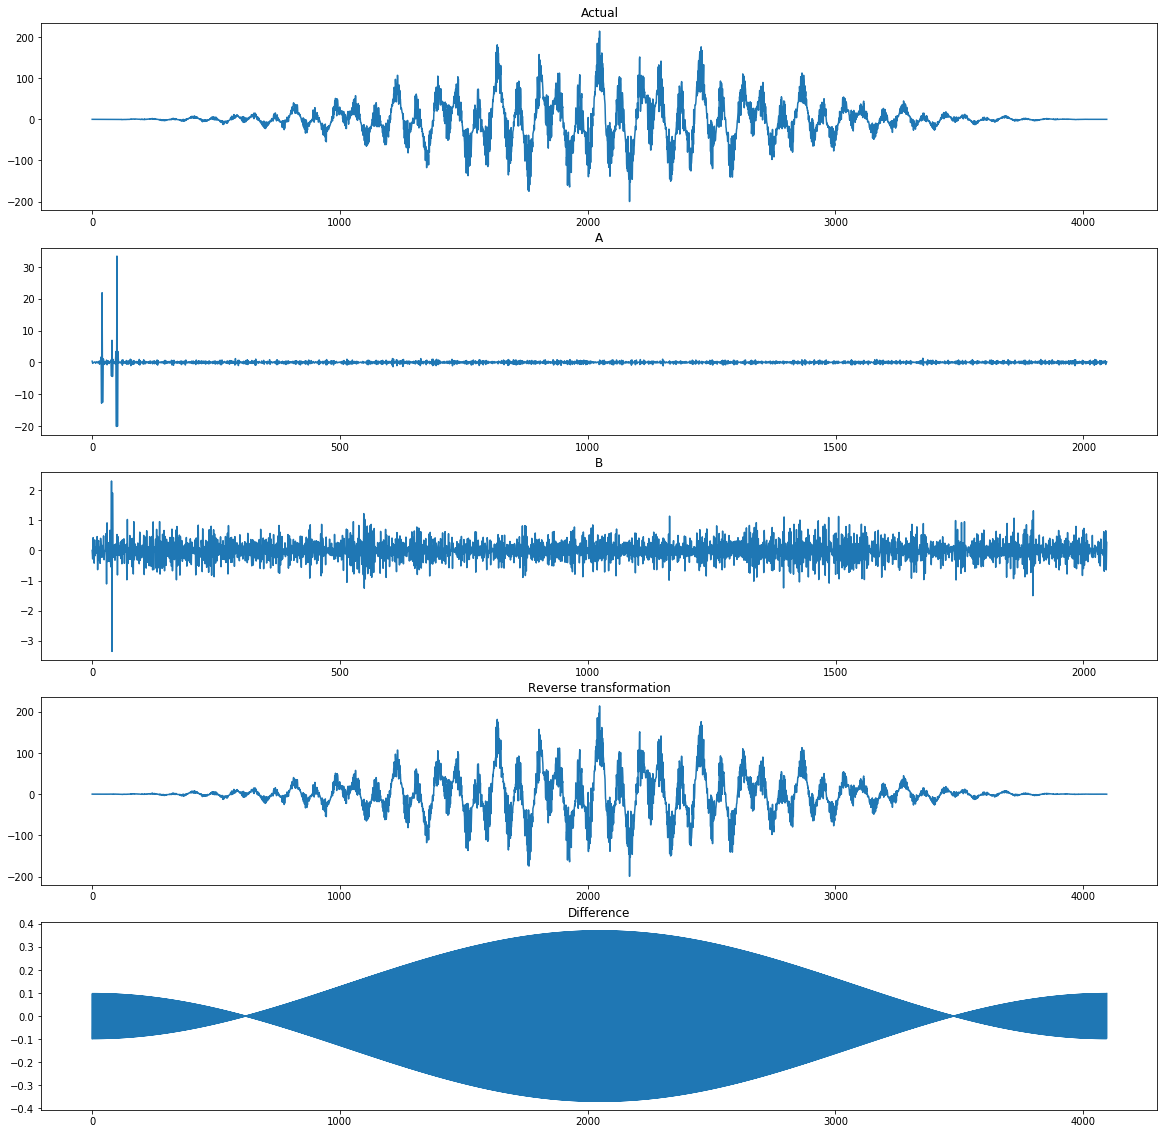

In [52]:
va = np.array([0.42 - 0.5 * np.cos(2 * np.pi * i / N) + 0.08 * np.cos(4 * np.pi * i / N)
              for i in range(N)])

s1 = s2 * va

a, b, c = transformation(s1=s1)
r1 = reverse_transformation(a, b)
plot(s1=s1, a=a, b=b, r1=r1)

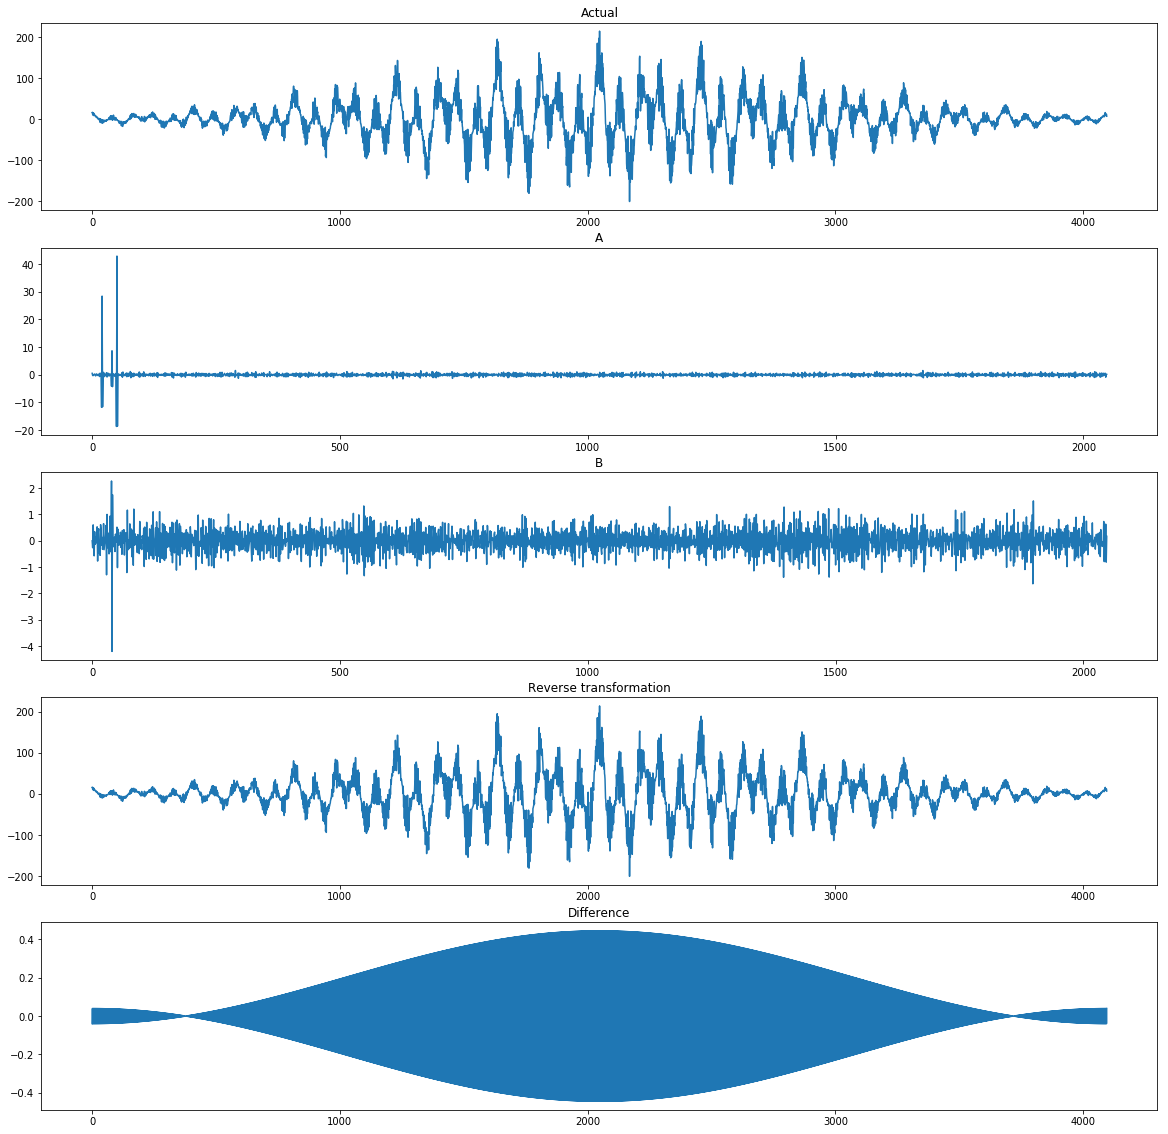

In [53]:
vb = np.array([0.54 - 0.46 * np.cos(2 * np.pi * i / N) for i in range(N)])

s1 = s2 * vb

a, b, c = transformation(s1=s1)
r1 = reverse_transformation(a, b)
plot(s1=s1, a=a, b=b, r1=r1)